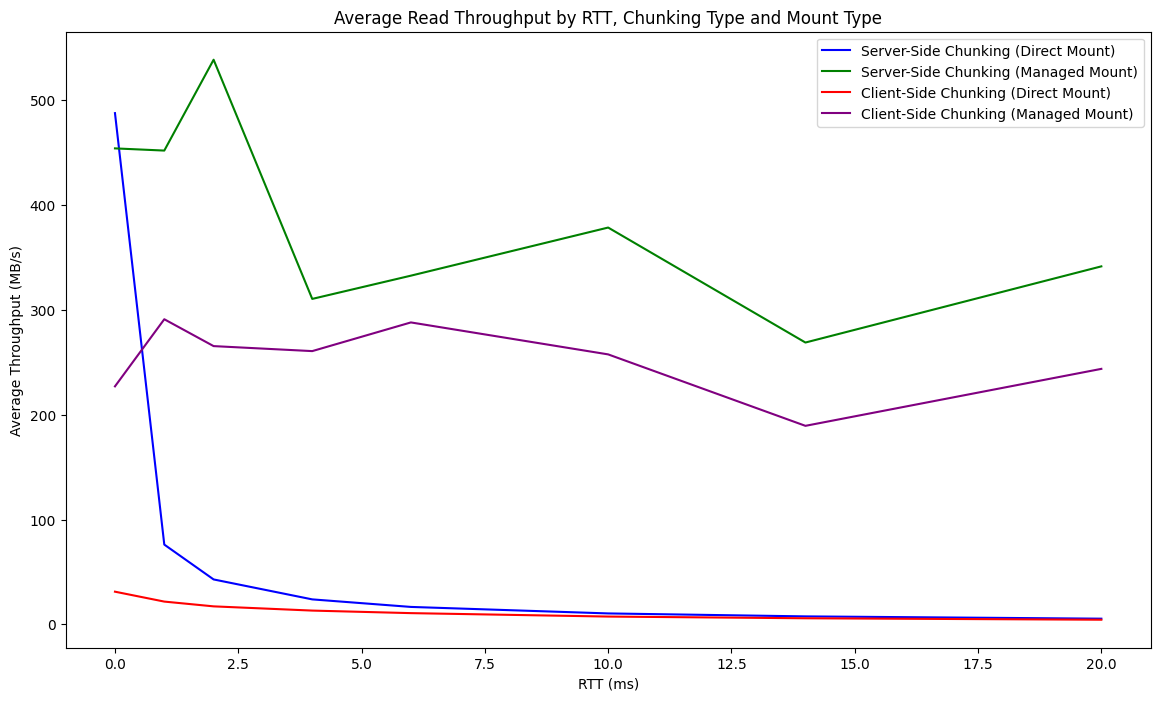

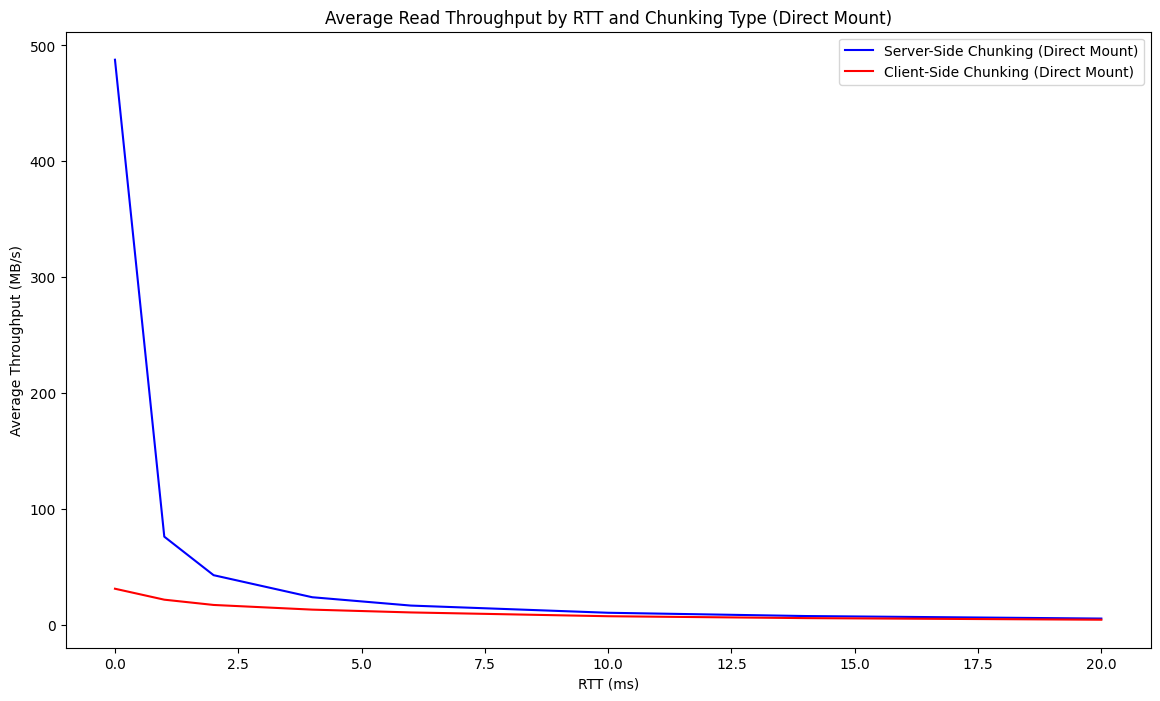

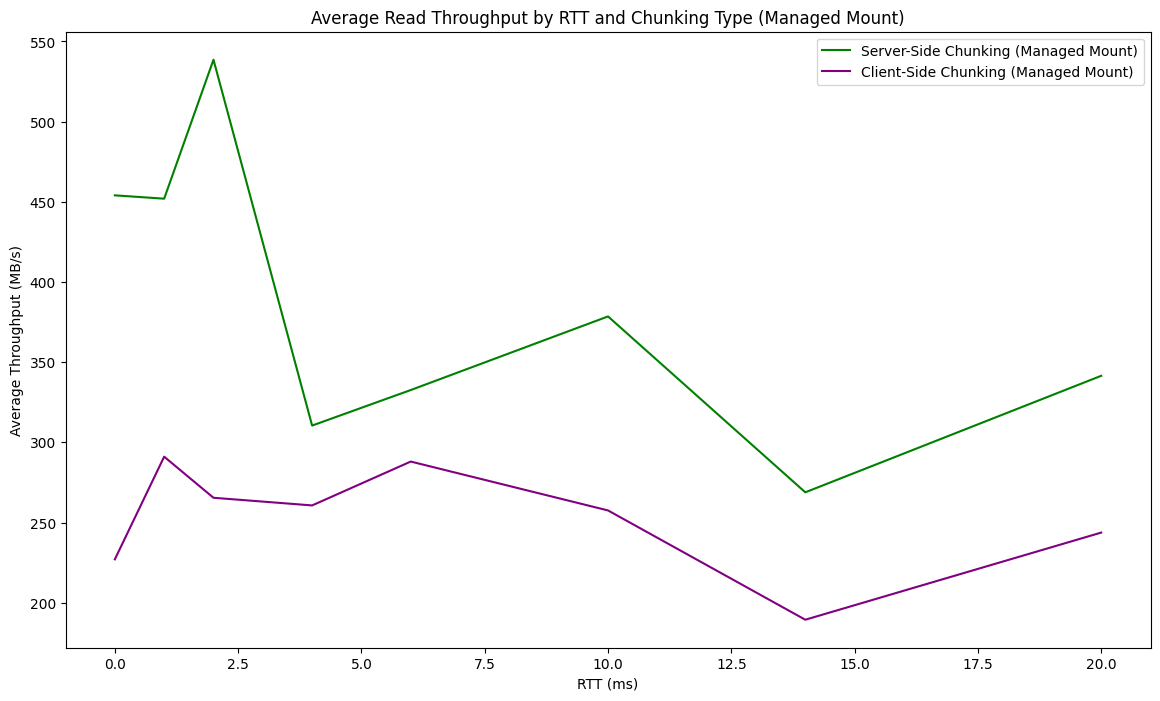

In [2]:
# Cell 1: Import the necessary libraries and load the data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../bench/chunking-local-remote/results.csv')

# Cell 2: Fill in the missing RTT values and calculate the average throughput for each RTT value
df['RTT (ms)'].fillna(method='ffill', inplace=True)
df_avg = df.groupby('RTT (ms)').mean().reset_index()

# Convert the RTT values to integers for proper plotting
df_avg['RTT (ms)'] = df_avg['RTT (ms)'].str.replace('ms', '').astype(int)

# Sort the dataframe by RTT for proper plotting
df_avg.sort_values('RTT (ms)', inplace=True)

# Cell 3: Create the first line plot
plt.figure(figsize=(14, 8))

plt.plot(df_avg['RTT (ms)'], df_avg['Throughput for Server-Side Chunking (Direct Mount) (MB/s)'], label='Server-Side Chunking (Direct Mount)', color='blue')
plt.plot(df_avg['RTT (ms)'], df_avg['Throughput for Server-Side Chunking (Managed Mount) (MB/s)'], label='Server-Side Chunking (Managed Mount)', color='green')
plt.plot(df_avg['RTT (ms)'], df_avg['Throughput for Client-Side Chunking (Direct Mount) (MB/s)'], label='Client-Side Chunking (Direct Mount)', color='red')
plt.plot(df_avg['RTT (ms)'], df_avg['Throughput for Client-Side Chunking (Managed Mount) (MB/s)'], label='Client-Side Chunking (Managed Mount)', color='purple')

plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')
plt.title('Average Read Throughput by RTT, Chunking Type and Mount Type')
plt.legend()

plt.show()

# Cell 4: Create the line plot for Direct Mount
plt.figure(figsize=(14, 8))

plt.plot(df_avg['RTT (ms)'], df_avg['Throughput for Server-Side Chunking (Direct Mount) (MB/s)'], label='Server-Side Chunking (Direct Mount)', color='blue')
plt.plot(df_avg['RTT (ms)'], df_avg['Throughput for Client-Side Chunking (Direct Mount) (MB/s)'], label='Client-Side Chunking (Direct Mount)', color='red')

plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')
plt.title('Average Read Throughput by RTT and Chunking Type (Direct Mount)')
plt.legend()

plt.show()

# Cell 5: Create the line plot for Managed Mount
plt.figure(figsize=(14, 8))

plt.plot(df_avg['RTT (ms)'], df_avg['Throughput for Server-Side Chunking (Managed Mount) (MB/s)'], label='Server-Side Chunking (Managed Mount)', color='green')
plt.plot(df_avg['RTT (ms)'], df_avg['Throughput for Client-Side Chunking (Managed Mount) (MB/s)'], label='Client-Side Chunking (Managed Mount)', color='purple')

plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')
plt.title('Average Read Throughput by RTT and Chunking Type (Managed Mount)')
plt.legend()

plt.show()